In [1]:
!pip install tensorflow

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Convolution2D
from tensorflow.keras.layers import MaxPooling2D
from tensorflow.keras.layers import Flatten

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,zoom_range=0.2,horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

In [5]:
x_train= train_datagen.flow_from_directory(r'C:\Users\KARTHIK\Downloads\dataset\dataset\Training',target_size=(64,64),batch_size=32,class_mode="categorical")
x_test = test_datagen.flow_from_directory(r'C:\Users\KARTHIK\Downloads\dataset\dataset\Testing',target_size = (64,64 n),batch_size = 32 , class_mode = 'categorical')

Found 1238 images belonging to 4 classes.
Found 326 images belonging to 4 classes.


In [6]:
print(x_train.class_indices)

{'bears': 0, 'crows': 1, 'elephants': 2, 'rats': 3}


In [7]:
model = Sequential()

In [8]:
model.add(Convolution2D(32,(3,3),input_shape=(64,64,3),activation = "relu"))

C:\Users\KARTHIK\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [9]:
model.add(MaxPooling2D(pool_size=(2,2)))

In [10]:
model.add(Flatten())

In [11]:
model.add(Dense(units=128,activation="relu"))

In [12]:
model.add(Dense(units=4,activation = "softmax"))

In [13]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


In [14]:
model.fit(x_train,steps_per_epoch=39,epochs=5,validation_data = x_test,validation_steps = 10)

Epoch 1/5


C:\Users\KARTHIK\anaconda3\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


39/39 ━━━━━━━━━━━━━━━━━━━━ 37s 768ms/step - accuracy: 0.2917 - loss: 2.6771 - val_accuracy: 0.4406 - val_loss: 1.1895
Epoch 2/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.3333 - val_loss: 1.1078
Epoch 3/5


C:\Users\KARTHIK\anaconda3\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 391ms/step - accuracy: 0.4945 - loss: 1.1293 - val_accuracy: 0.6875 - val_loss: 0.8651
Epoch 4/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.6667 - val_loss: 0.9659
Epoch 5/5
39/39 ━━━━━━━━━━━━━━━━━━━━ 18s 398ms/step - accuracy: 0.6438 - loss: 0.8892 - val_accuracy: 0.7406 - val_loss: 0.7184


In [15]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 62, 62, 32)          │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 31, 31, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 30752)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,936,384 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4)                   │             516 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,813,390 (45.06 MB)

 Trainable params: 3,937,796 (15.02 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 7,875,594 (30.04 MB)

In [16]:
model.save("animal.h5")

In [17]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image
import numpy as np

In [18]:
import tensorflow as tf

In [19]:
model = tf.keras.models.load_model(r"C:\Users\KARTHIK\Downloads\dataset\animal.h5",compile = False)

In [20]:
img = image.load_img(r"C:\Users\KARTHIK\Downloads\dataset\bear.jpeg",target_size=(64,64))

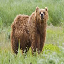

In [21]:
img

In [22]:
x = image.img_to_array(img)

In [23]:
x

array([[[162., 178., 142.],
        [167., 184., 139.],
        [165., 182., 138.],
        ...,
        [152., 169., 127.],
        [176., 193., 151.],
        [173., 190., 148.]],

       [[167., 183., 144.],
        [165., 182., 137.],
        [166., 183., 138.],
        ...,
        [174., 191., 146.],
        [176., 193., 148.],
        [167., 184., 139.]],

       [[172., 189., 144.],
        [156., 174., 126.],
        [169., 186., 141.],
        ...,
        [159., 177., 127.],
        [163., 181., 131.],
        [163., 181., 131.]],

       ...,

       [[167., 183., 120.],
        [162., 180., 104.],
        [137., 159.,  59.],
        ...,
        [156., 176., 113.],
        [163., 182., 127.],
        [134., 154.,  93.]],

       [[170., 185., 126.],
        [157., 175., 101.],
        [135., 156.,  61.],
        ...,
        [191., 208., 164.],
        [198., 214., 177.],
        [158., 176., 128.]],

       [[152., 170., 110.],
        [153., 173., 102.],
        [139., 1

In [24]:
x = np.expand_dims(x,axis=0)

In [25]:
x.shape

(1, 64, 64, 3)

In [26]:
pred = model.predict(x)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step


In [27]:
pred

array([[1., 0., 0., 0.]], dtype=float32)

In [28]:
pred_class = np.argmax(pred,axis=1)

In [29]:
pred_class[0]

0

In [30]:
index = ['bears','crows','elephants','rats']
result = str(index[pred_class[0]])

In [31]:
result

'bears'